In [10]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [11]:
df = pd.read_csv("sample_data_from_patent.csv")
print(df.head())
df.describe()

sample  event
0       3   19.0
1       4   19.0
2       2   19.1
3       1   19.2
4       9   19.5


,sample,event
count,97.000000,97.000000
mean,5.391753,40.086598
std,3.063756,13.547798
min,1.000000,19.000000
25%,3.000000,28.400000
50%,5.000000,40.000000
75%,8.000000,49.000000
max,10.000000,70.900000


### Plot data

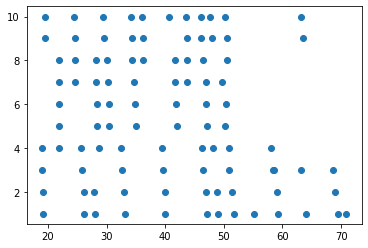

In [12]:
plt.scatter(df.values[:,1],df.values[:,0])
plt.show()

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=df['event'].values,
                                y=df['sample'].values,
                                mode='markers'
                                )) # hover text goes here

fig.update_layout(
    title="sample scatter plot",
    xaxis_title="peak position",
    yaxis_title="Samples",
    font=dict(
        size=10,
        color="#7f7f7f"
    )
)
fig.show()

### Binning and generating Events!

In [14]:
peaks = np.array(df.values[:,1])
samples = np.array(df.values[:,0])
n_bins = 25

bin_width = (max(peaks) - min(peaks))/n_bins
print("bin width: ", bin_width)
bins = np.arange(min(peaks), max(peaks)+bin_width+1, step=bin_width, dtype=float)
events = []
for i, (start,end) in enumerate(zip(bins[:-1], bins[1:])):
    out = samples[(peaks <= end) & (peaks >= start)]
    if len(out)>0:
        events.append(out)
        print(f"Event{i}:",out, f" min: {round(start,2)}, max:{round(end,2)}")
    else:
        events.append(None)
        print(f"Event{i}")




bin width:  2.076
Event0: [ 3.  4.  2.  1.  9. 10.]  min: 19.0, max:21.08
Event1: [8. 4. 5. 6. 7.]  min: 21.08, max:23.15
Event2: [10.  7.  8.  9.]  min: 23.15, max:25.23
Event3: [4. 3. 2. 1.]  min: 25.23, max:27.3
Event4: [2. 1. 7. 8. 5. 6. 4.]  min: 27.3, max:29.38
Event5: [10.  9.  8.  7.  5.  6.]  min: 29.38, max:31.46
Event6: [4. 3. 2. 1.]  min: 31.46, max:33.53
Event7: [10.  9.  8.  7.  6.  5.]  min: 33.53, max:35.61
Event8: [10.  8.  9.]  min: 35.61, max:37.68
Event9: [4. 3.]  min: 37.68, max:39.76
Event10: [ 1.  2. 10.  7.  8.]  min: 39.76, max:41.84
Event11: [ 6.  5. 10.  9.  7.  8.]  min: 41.84, max:43.91
Event12
Event13: [ 9. 10.  4.  3.  8.  2.  6.  7.  5.  1. 10.  9.]  min: 45.99, max:48.06
Event14: [4. 2. 1. 7.]  min: 48.06, max:50.14
Event15: [ 5. 10.  6.  9.  8.  4.  3.  2.  1.]  min: 50.14, max:52.22
Event16
Event17: [1.]  min: 54.29, max:56.37
Event18: [4. 3.]  min: 56.37, max:58.44
Event19: [3. 2. 1.]  min: 58.44, max:60.52
Event20
Event21: [ 3. 10.  9.  1.]  min: 62

### Co-occurence matrix

In [15]:
n_events = len(events)
co_mat = np.zeros((n_events, n_events), dtype=float)
co_mat_samples = np.zeros((n_events, n_events), dtype=object)

for i in range(n_events):
    for j in range(n_events):
        if (events[i] is not None) and (events[j]  is not None): 
            v =  np.intersect1d(events[i], events[j])
            co_mat[i,j] = len(v)
            co_mat_samples[i,j] = v
 

In [48]:
import plotly
import plotly.graph_objects as go
xy = [f"Event {xs}" for xs in np.arange(n_events)]
fig = go.Figure(data=go.Heatmap(
                   z=co_mat,
                   x=xy,
                   y=xy,
                   hoverongaps = False,colorscale='Reds'))

fig.show()
plotly.offline.plot(fig, filename='co_mat.html')

'co_mat.html'

### Computing the nuclei

In [49]:
nuclei = {'phase': [], 'samples':[],'values':[] }
for i in range(n_events):
    for j in range(n_events):
        if (i != j) and co_mat[i,i] != 0:
            if (co_mat[i,i] == co_mat[i,j]) and (co_mat[i,i] == co_mat[j,j]):
                nuclei['phase'].append((i,j))
                nuclei['samples'].append(co_mat_samples[i,j])
                nuclei['values'].append(co_mat[i,j])
                print("phase: ",(i,j), ", samples: ",co_mat_samples[i,j],", value: ",co_mat[i,j])




phase:  (3, 6) , samples:  [1. 2. 3. 4.] , value:  4.0
phase:  (5, 7) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (5, 11) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (6, 3) , samples:  [1. 2. 3. 4.] , value:  4.0
phase:  (7, 5) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (7, 11) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (9, 18) , samples:  [3. 4.] , value:  2.0
phase:  (11, 5) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (11, 7) , samples:  [ 5.  6.  7.  8.  9. 10.] , value:  6.0
phase:  (17, 25) , samples:  [1.] , value:  1.0
phase:  (18, 9) , samples:  [3. 4.] , value:  2.0
phase:  (25, 17) , samples:  [1.] , value:  1.0


### Merging and Removing redundancy 

In [50]:
ps = []
for val in set(nuclei['values']):
    p = set(np.array(nuclei['phase'])[np.array(nuclei['values'])==val].flatten())
    s = set(np.hstack(np.array(nuclei['samples'])[np.array(nuclei['values'])==val]))
    ps.append((p,s))
    print("phase: ",p,", samples: ", s,", value: ", val)

phase:  {17, 25} , samples:  {1.0} , value:  1.0
phase:  {9, 18} , samples:  {3.0, 4.0} , value:  2.0
phase:  {3, 6} , samples:  {1.0, 2.0, 3.0, 4.0} , value:  4.0
phase:  {11, 5, 7} , samples:  {5.0, 6.0, 7.0, 8.0, 9.0, 10.0} , value:  6.0


### Event vs Samples Scatter plot

In [51]:
es_data = np.zeros((len(np.hstack([e for e in events if e is not None])),3))
np.shape(es_data)
indx = 0 
for i, event in enumerate(events):
    if event is not None:
        l = len(event); 
        start = indx; end = indx + l
        es_data[start:end,0] = i
        es_data[start:end,1] = event
        indx += l
color_increment = round(1/float(len(ps)),2)
c = 0
for p,s in ps:
    c = c + color_increment
    for pp in p:
        es_data[es_data[:,0]==pp , 2] = c



print(es_data)

[[ 0.    3.    0.  ]
 [ 0.    4.    0.  ]
 [ 0.    2.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.    9.    0.  ]
 [ 0.   10.    0.  ]
 [ 1.    8.    0.  ]
 [ 1.    4.    0.  ]
 [ 1.    5.    0.  ]
 [ 1.    6.    0.  ]
 [ 1.    7.    0.  ]
 [ 2.   10.    0.  ]
 [ 2.    7.    0.  ]
 [ 2.    8.    0.  ]
 [ 2.    9.    0.  ]
 [ 3.    4.    0.75]
 [ 3.    3.    0.75]
 [ 3.    2.    0.75]
 [ 3.    1.    0.75]
 [ 4.    2.    0.  ]
 [ 4.    1.    0.  ]
 [ 4.    7.    0.  ]
 [ 4.    8.    0.  ]
 [ 4.    5.    0.  ]
 [ 4.    6.    0.  ]
 [ 4.    4.    0.  ]
 [ 5.   10.    1.  ]
 [ 5.    9.    1.  ]
 [ 5.    8.    1.  ]
 [ 5.    7.    1.  ]
 [ 5.    5.    1.  ]
 [ 5.    6.    1.  ]
 [ 6.    4.    0.75]
 [ 6.    3.    0.75]
 [ 6.    2.    0.75]
 [ 6.    1.    0.75]
 [ 7.   10.    1.  ]
 [ 7.    9.    1.  ]
 [ 7.    8.    1.  ]
 [ 7.    7.    1.  ]
 [ 7.    6.    1.  ]
 [ 7.    5.    1.  ]
 [ 8.   10.    0.  ]
 [ 8.    8.    0.  ]
 [ 8.    9.    0.  ]
 [ 9.    4.    0.5 ]
 [ 9.    3.    0.5 ]
 [10.    1.  

In [52]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=es_data[:,0],
                                y=es_data[:,1],
                                mode='markers',
                                marker=dict(
                                    size=12,
                                    color=es_data[:,2], #set color equal to a variable
                                    colorscale='Viridis', # one of plotly colorscales
                                    showscale=True
                                )
                                )) # hover text goes here

fig.update_layout(
    title="events_samples_phases",
    xaxis_title="events",
    yaxis_title="Samples",
    font=dict(
        size=10,
        color="#7f7f7f"
    )
)
fig.show()
plotly.offline.plot(fig, filename='events_samples_phases.html')

'events_samples_phases.html'




## End of code!!!






















